In [16]:
import pandas as pd
import numpy as np

In [17]:
data=pd.read_csv("ADANIPOWER.NS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,24.500000,24.700001,23.600000,24.450001,24.450001,13084386
1,2018-04-03,24.200001,25.200001,23.700001,25.100000,25.100000,17305908
2,2018-04-04,25.049999,26.350000,24.750000,25.049999,25.049999,26472761
3,2018-04-05,25.600000,25.850000,25.250000,25.500000,25.500000,14516075
4,2018-04-06,25.600000,26.000000,25.299999,25.650000,25.650000,14599472


In [18]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1233,2023-03-24,202.550003,204.000000,192.149994,192.600006,192.600006,13774170
1234,2023-03-27,195.600006,195.600006,183.000000,183.000000,183.000000,8057710
1235,2023-03-28,178.949997,183.000000,173.850006,173.850006,173.850006,5385184
1236,2023-03-29,167.000000,182.500000,166.399994,182.500000,182.500000,16463799
1237,2023-03-31,190.449997,191.600006,188.649994,191.600006,191.600006,7735789


In [19]:
data1=data["Close"]

In [20]:
data1.shape

(1238,)

In [21]:
import matplotlib.pyplot as plt

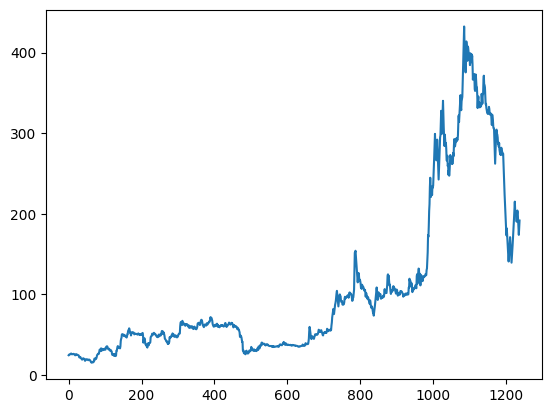

In [22]:
plt.plot(data1)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [25]:
data1.shape

(1238, 1)

In [26]:
print(data1)

[[0.02158015]
 [0.02313871]
 [0.02301882]
 ...
 [0.37981059]
 [0.40055149]
 [0.42237143]]


In [27]:
#splitting data into train and test 

In [28]:
training_size=int(len(data1)*0.70)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]


In [30]:
training_size,test_size

(866, 372)

In [29]:
#convert an array into a dataset matrix

In [31]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
#reshaping 

In [32]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [36]:
print(x_train.shape),print(y_train.shape)

(765, 100)
(765,)


(None, None)

In [37]:
print(x_test.shape),print(y_test.shape)

(271, 100)
(271,)


(None, None)

In [ ]:
#reshaping into 3d

In [39]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
#creating the model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 20s 752ms/step - loss: 0.0033 - val_loss: 0.1253
Epoch 2/100
12/12 [==============================] - 7s 571ms/step - loss: 0.0011 - val_loss: 0.0239
Epoch 3/100
12/12 [==============================] - 7s 548ms/step - loss: 5.6184e-04 - val_loss: 0.0085
Epoch 4/100
12/12 [==============================] - 7s 556ms/step - loss: 4.1154e-04 - val_loss: 0.0090
Epoch 5/100
12/12 [==============================] - 7s 568ms/step - loss: 3.7345e-04 - val_loss: 0.0069
Epoch 6/100
12/12 [==============================] - 6s 535ms/step - loss: 3.6609e-04 - val_loss: 0.0065
Epoch 7/100
12/12 [==============================] - 6s 529ms/step - loss: 3.4719e-04 - val_loss: 0.0080
Epoch 8/100
12/12 [==============================] - 6s 533ms/step - loss: 3.5845e-04 - val_loss: 0.0084
Epoch 9/100
12/12 [==============================] - 6s 528ms/step - loss: 3.3195e-04 - val_loss: 0.0084
Epoch 10/100
12/12 [==============================] - 6s 545ms

12/12 [==============================] - 6s 517ms/step - loss: 8.4378e-05 - val_loss: 0.0063
Epoch 79/100
12/12 [==============================] - 4s 311ms/step - loss: 7.9493e-05 - val_loss: 0.0066
Epoch 80/100
12/12 [==============================] - 6s 486ms/step - loss: 8.1266e-05 - val_loss: 0.0052
Epoch 81/100
12/12 [==============================] - 6s 507ms/step - loss: 7.6876e-05 - val_loss: 0.0092
Epoch 82/100
12/12 [==============================] - 6s 515ms/step - loss: 7.3626e-05 - val_loss: 0.0057
Epoch 83/100
12/12 [==============================] - 6s 526ms/step - loss: 7.1498e-05 - val_loss: 0.0061
Epoch 84/100
12/12 [==============================] - 6s 480ms/step - loss: 7.6113e-05 - val_loss: 0.0066
Epoch 85/100
12/12 [==============================] - 6s 511ms/step - loss: 6.8669e-05 - val_loss: 0.0064
Epoch 86/100
12/12 [==============================] - 6s 491ms/step - loss: 6.6224e-05 - val_loss: 0.0035
Epoch 87/100
12/12 [==============================] - 6s 50

In [ ]:
#prediction to check performance

In [44]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

9/9 [==============================] - 1s 63ms/step


In [45]:
#transform back to original 

In [46]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [47]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

60.19925852315891

In [48]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

259.93271631221114

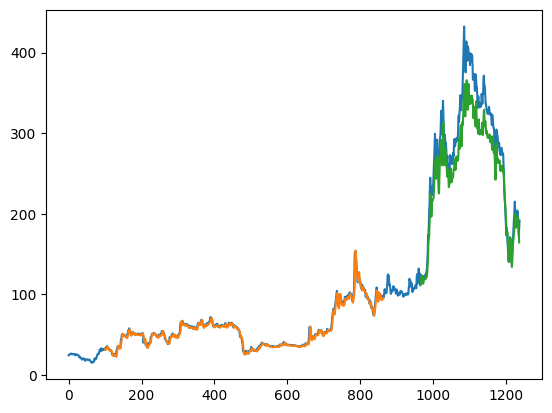

In [49]:
#plotting 
look_back=100
trainpredictplot=np.empty_like(data1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#test prediction
testpredictplot=np.empty_like(data1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(data1)-1,:]=test_predict
#plot baseline
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [50]:
len(test_data)

372

In [52]:
x_input=test_data[272:].reshape(1,-1)
x_input.shape

(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.8400671094592974,
 0.8534947704112216,
 0.826639520441194,
 0.8256803452823401,
 0.8190864117012348,
 0.7905526771370339,
 0.7686128761539384,
 0.7698117731686848,
 0.757103493585901,
 0.7506294209327419,
 0.7445150749310634,
 0.7421172809015706,
 0.7397194868720777,
 0.7500299724253686,
 0.7415178323941973,
 0.7608200455580865,
 0.7551852152020141,
 0.7429564512648362,
 0.7375614146984774,
 0.7417575542500898,
 0.7409183838868241,
 0.7392398992926508,
 0.7207768564920273,
 0.7067498189665508,
 0.7374415537705311,
 0.7286896199496463,
 0.7193382376213883,
 0.7012348495384246,
 0.6961994676897254,
 0.6960796067617792,
 0.6595132478120129,
 0.6247452343843664,
 0.5916557055508932,
 0.6230667497901929,
 0.6560364176957199,
 0.6906845701954202,
 0.6930823642249131,
 0.681213255005395,
 0.6778563577508692,
 0.6697038724373576,
 0.6501618654837549,
 0.6553171082604003,
 0.6424888958158493,
 0.6527994533029613,
 0.6324182040522719,
 0.6252248219637934,
 0.6191104040282939,
 0.6312193070375

In [55]:
#prediction for next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.410868]
101
1 day input [0.85349477 0.82663952 0.82568035 0.81908641 0.79055268 0.76861288
 0.76981177 0.75710349 0.75062942 0.74451507 0.74211728 0.73971949
 0.75002997 0.74151783 0.76082005 0.75518522 0.74295645 0.73756141
 0.74175755 0.74091838 0.7392399  0.72077686 0.70674982 0.73744155
 0.72868962 0.71933824 0.70123485 0.69619947 0.69607961 0.65951325
 0.62474523 0.59165571 0.62306675 0.65603642 0.69068457 0.69308236
 0.68121326 0.67785636 0.66970387 0.65016187 0.65531711 0.6424889
 0.65279945 0.6324182  0.62522482 0.6191104  0.63121931 0.61743199
 0.63901214 0.63121931 0.62846179 0.6224673  0.61803144 0.6215082
 0.58877832 0.5574871  0.52775447 0.49958039 0.47284497 0.44742837
 0.42321064 0.40019184 0.3783719  0.3991128  0.3772929  0.35667185
 0.33700995 0.31830715 0.30056349 0.31734805 0.33497181 0.35355472
 0.37297686 0.35247572 0.33305361 0.31459056 0.29708669 0.31375136
 0.33125526 0.34959837 0.36890062 0.38916197 0.41038246 0.43268192
 0.45426206 0.47871959 0.45294331 0.4

8 day output [[0.3192292]]
9 day input [0.75062942 0.74451507 0.74211728 0.73971949 0.75002997 0.74151783
 0.76082005 0.75518522 0.74295645 0.73756141 0.74175755 0.74091838
 0.7392399  0.72077686 0.70674982 0.73744155 0.72868962 0.71933824
 0.70123485 0.69619947 0.69607961 0.65951325 0.62474523 0.59165571
 0.62306675 0.65603642 0.69068457 0.69308236 0.68121326 0.67785636
 0.66970387 0.65016187 0.65531711 0.6424889  0.65279945 0.6324182
 0.62522482 0.6191104  0.63121931 0.61743199 0.63901214 0.63121931
 0.62846179 0.6224673  0.61803144 0.6215082  0.58877832 0.5574871
 0.52775447 0.49958039 0.47284497 0.44742837 0.42321064 0.40019184
 0.3783719  0.3991128  0.3772929  0.35667185 0.33700995 0.31830715
 0.30056349 0.31734805 0.33497181 0.35355472 0.37297686 0.35247572
 0.33305361 0.31459056 0.29708669 0.31375136 0.33125526 0.34959837
 0.36890062 0.38916197 0.41038246 0.43268192 0.45426206 0.47871959
 0.45294331 0.44682892 0.43939575 0.44239299 0.4190145  0.44179354
 0.45222396 0.44586979 0.

16 day output [[0.28025752]]
17 day input [0.74295645 0.73756141 0.74175755 0.74091838 0.7392399  0.72077686
 0.70674982 0.73744155 0.72868962 0.71933824 0.70123485 0.69619947
 0.69607961 0.65951325 0.62474523 0.59165571 0.62306675 0.65603642
 0.69068457 0.69308236 0.68121326 0.67785636 0.66970387 0.65016187
 0.65531711 0.6424889  0.65279945 0.6324182  0.62522482 0.6191104
 0.63121931 0.61743199 0.63901214 0.63121931 0.62846179 0.6224673
 0.61803144 0.6215082  0.58877832 0.5574871  0.52775447 0.49958039
 0.47284497 0.44742837 0.42321064 0.40019184 0.3783719  0.3991128
 0.3772929  0.35667185 0.33700995 0.31830715 0.30056349 0.31734805
 0.33497181 0.35355472 0.37297686 0.35247572 0.33305361 0.31459056
 0.29708669 0.31375136 0.33125526 0.34959837 0.36890062 0.38916197
 0.41038246 0.43268192 0.45426206 0.47871959 0.45294331 0.44682892
 0.43939575 0.44239299 0.4190145  0.44179354 0.45222396 0.44586979
 0.42476923 0.40175039 0.37981059 0.40055149 0.42237143 0.41086799
 0.41288319 0.39659357 

24 day output [[0.2537946]]
25 day input [0.72868962 0.71933824 0.70123485 0.69619947 0.69607961 0.65951325
 0.62474523 0.59165571 0.62306675 0.65603642 0.69068457 0.69308236
 0.68121326 0.67785636 0.66970387 0.65016187 0.65531711 0.6424889
 0.65279945 0.6324182  0.62522482 0.6191104  0.63121931 0.61743199
 0.63901214 0.63121931 0.62846179 0.6224673  0.61803144 0.6215082
 0.58877832 0.5574871  0.52775447 0.49958039 0.47284497 0.44742837
 0.42321064 0.40019184 0.3783719  0.3991128  0.3772929  0.35667185
 0.33700995 0.31830715 0.30056349 0.31734805 0.33497181 0.35355472
 0.37297686 0.35247572 0.33305361 0.31459056 0.29708669 0.31375136
 0.33125526 0.34959837 0.36890062 0.38916197 0.41038246 0.43268192
 0.45426206 0.47871959 0.45294331 0.44682892 0.43939575 0.44239299
 0.4190145  0.44179354 0.45222396 0.44586979 0.42476923 0.40175039
 0.37981059 0.40055149 0.42237143 0.41086799 0.41288319 0.39659357
 0.37417221 0.35254964 0.33581814 0.3254596  0.32064912 0.31922919
 0.31878501 0.31739947 

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [58]:
len(data1)

1238

In [57]:
data3=data1.tolist()
data3.extend(lst_output)

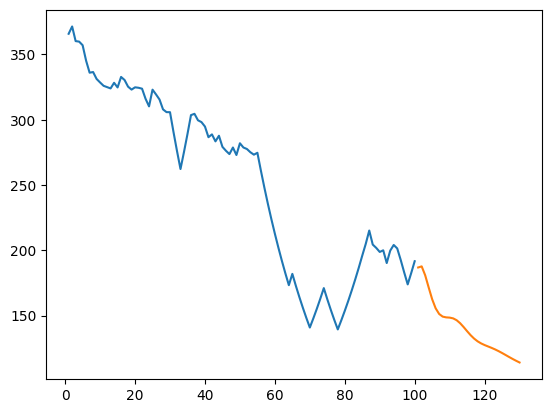

In [59]:
plt.plot(day_new,scaler.inverse_transform(data1[1138:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

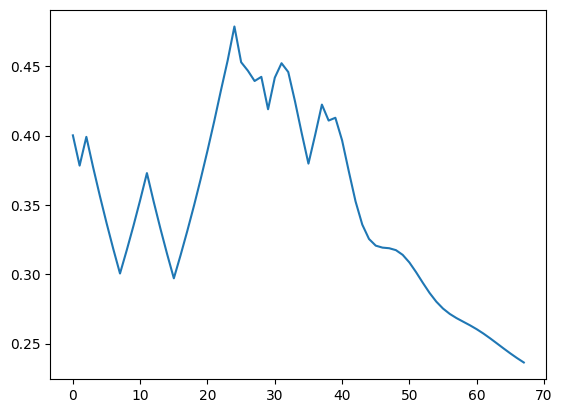

In [61]:
data3=data1.tolist()
data3.extend(lst_output)
plt.plot(data3[1200:])